In [1]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
OUTPUT_PATH = f'{STUD_PATH}stud5/output/'

In [2]:
INPUT_PATH = f'{OUTPUT_PATH}complete_liver_clpp17.h5ad'
TISSUE = INPUT_PATH.split('/')[-1].replace('_clpp17.h5ad', '')
TSV_OUT = f"{OUTPUT_PATH}clusters_{TISSUE}.tsv"

In [3]:
adata = ad.read(INPUT_PATH)
adata

AnnData object with n_obs × n_vars = 194387 × 1151968
    obs: 'batch', 'nb_features'
    var: 'n_cells', 'n_counts', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'normalised'

In [4]:
epi.pp.log1p(adata)

In [5]:
#epi.pp.lazy(adata, min_dist=1.0, spread=2.0)
sc.pp.pca(adata, n_comps=50, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, method='umap', metric='euclidean')

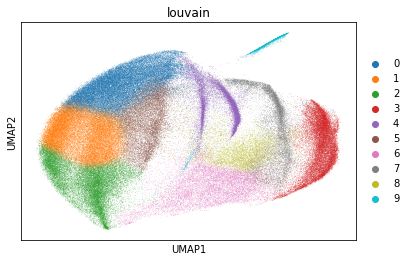

In [6]:
#sc.tl.umap(adata, min_dist=0.5, spread=1.0, n_components=2)
sc.tl.umap(adata, 0.1, 1.0)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

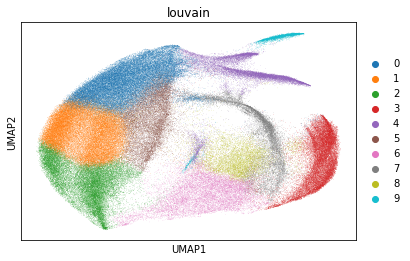

In [7]:
#sc.tl.umap(adata, min_dist=0.5, spread=1.0, n_components=2)
sc.tl.umap(adata, 0.1, 3.0)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

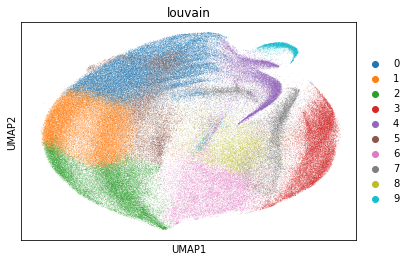

In [8]:
#sc.tl.umap(adata, min_dist=0.5, spread=1.0, n_components=2)
sc.tl.umap(adata, 0.001, 10.0)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

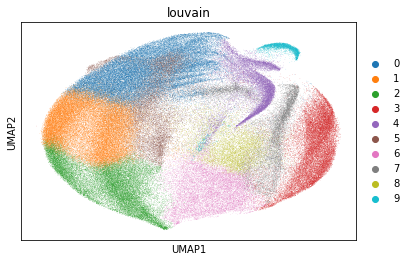

In [9]:
sc.tl.umap(adata, 0.1, 10.0)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

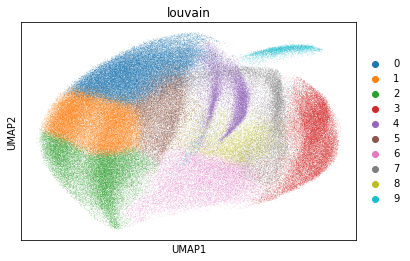

In [10]:
sc.tl.umap(adata, 1.0, 3.0)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

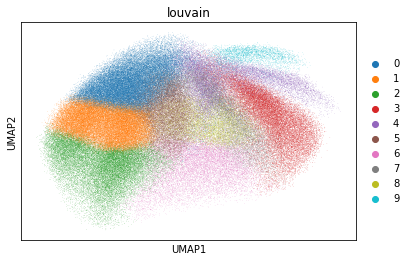

In [11]:
# wird eher ein großer blob
sc.tl.umap(adata, 1.0, 0.5)
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

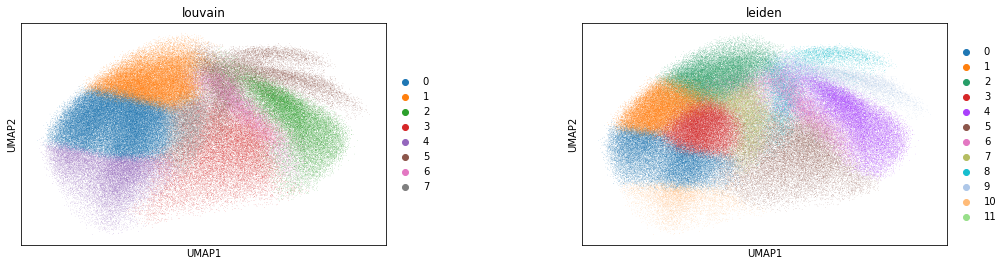

In [12]:
epi.tl.louvain(adata, resolution=0.5)
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

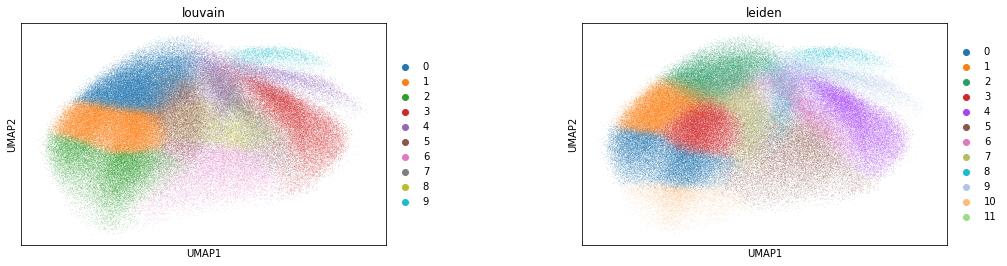

In [13]:
epi.tl.louvain(adata, resolution=1.0)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

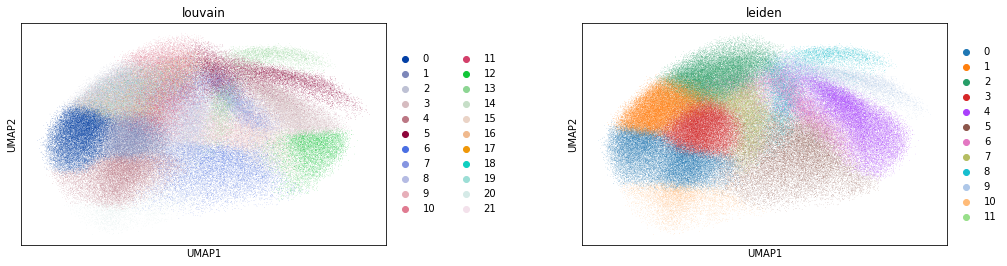

In [14]:
epi.tl.louvain(adata, resolution=1.5)
epi.pl.umap(adata, color=['louvain', 'leiden'], wspace=0.4)

In [15]:
adata

AnnData object with n_obs × n_vars = 194387 × 1151968
    obs: 'batch', 'nb_features', 'louvain', 'leiden'
    var: 'n_cells', 'n_counts', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalised'
    obsp: 'distances', 'connectivities'

In [ ]:
#epi.tl.rank_genes_groups(adata, groupby='bulk_labels', method='logreg')
# rank_genes_groups expects logarithmized data. so run cluster with log before?
epi.tl.rank_features(adata, groupby='louvain', omic='ATAC', n_features=None)
epi.pl.rank_feat_groups(adata)

In [ ]:
epi.pl.rank_feat_groups_matrixplot(adata)

In [ ]:
epi.pl.rank_feat_groups_dotplot(adata)

In [ ]:
len(adata.uns['rank_features_groups']['names'])

In [ ]:
sc.tl.tsne(adata, n_pcs=50, perplexity=30)

In [ ]:
epi.pl.tsne(adata, color=['louvain', 'leiden'])

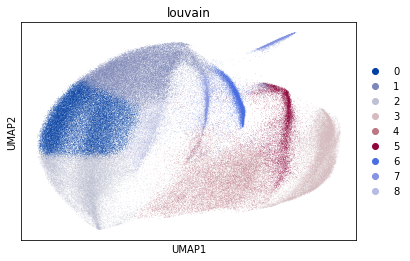

In [21]:
# optimal values with min_dist=0.1, spread=2.0, no weights
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.7)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

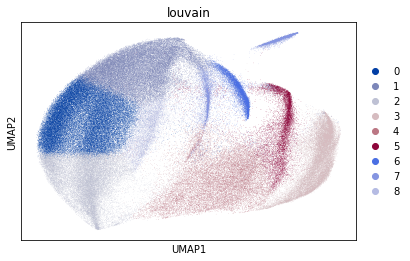

In [22]:
# optimal values with min_dist=0.1, spread=3.0, no weights
sc.tl.umap(adata, 0.1, 3.0)
epi.tl.louvain(adata, resolution=0.7)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

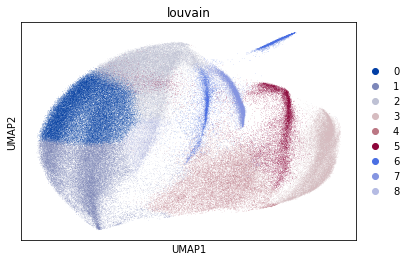

In [23]:
# optimal values with min_dist=0.1, spread=2.0, with weights
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.7, use_weights=True)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

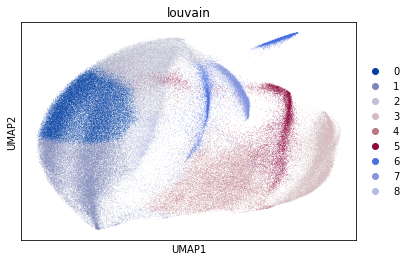

In [24]:
# optimal values with min_dist=0.1, spread=3.0, with weights
sc.tl.umap(adata, 0.1, 3.0)
epi.tl.louvain(adata, resolution=0.7, use_weights=True)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

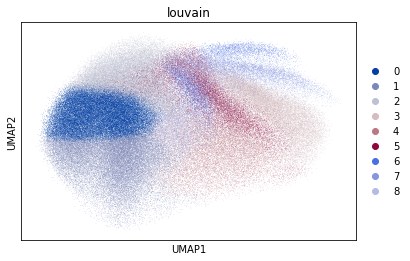

In [25]:
# experimental (wird eher ein großer blob)
sc.tl.umap(adata, 1.0, 0.5)
epi.tl.louvain(adata, resolution=0.7, use_weights=True)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)